# Testing the Effect of Activation Function on the Model

Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from FFNN.FFNN import FFNN

Import Dataset

In [2]:
# import dataset MNIST
mnist = fetch_openml(name='mnist_784', version=1, as_frame=False)

# Separate features (X) and labels (y)
X, y = mnist.data, mnist.target

# convert label from string to integer
y = y.astype(np.uint8)

# print dataset info
print(f"Shape X: {X.shape}")  # (70000, 784)
print(f"Shape y: {y.shape}")  # (70000,)

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# normalize the data
# pixel values are in range [0, 255], we normalize them to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# convert labels to one-hot encoding
num_classes = 10  # MNIST have 10 class (0-9)
y_train_one_hot = np.eye(num_classes)[y_train]
y_test_one_hot = np.eye(num_classes)[y_test]

# print the shape of the one-hot encoded labels
print(f"Shape y_train (one-hot): {y_train_one_hot.shape}")  # (56000, 10)
print(f"Shape y_test (one-hot): {y_test_one_hot.shape}")    # (14000, 10)

Shape X: (70000, 784)
Shape y: (70000,)
Train set: (56000, 784), Test set: (14000, 784)
Shape y_train (one-hot): (56000, 10)
Shape y_test (one-hot): (14000, 10)


# Pengaruh Fungsi Aktivasi

### Linear

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.4091, Val Loss: 0.4107
Training completed. Final Train Loss: 0.4091, Val Loss: 0.4107
Accuracy of FFNN: 0.8488
y_pred: [8 4 8 7 7 0 6 2 1 4 1 9 9 8 2 5 9 1 7 8]
y_test: [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


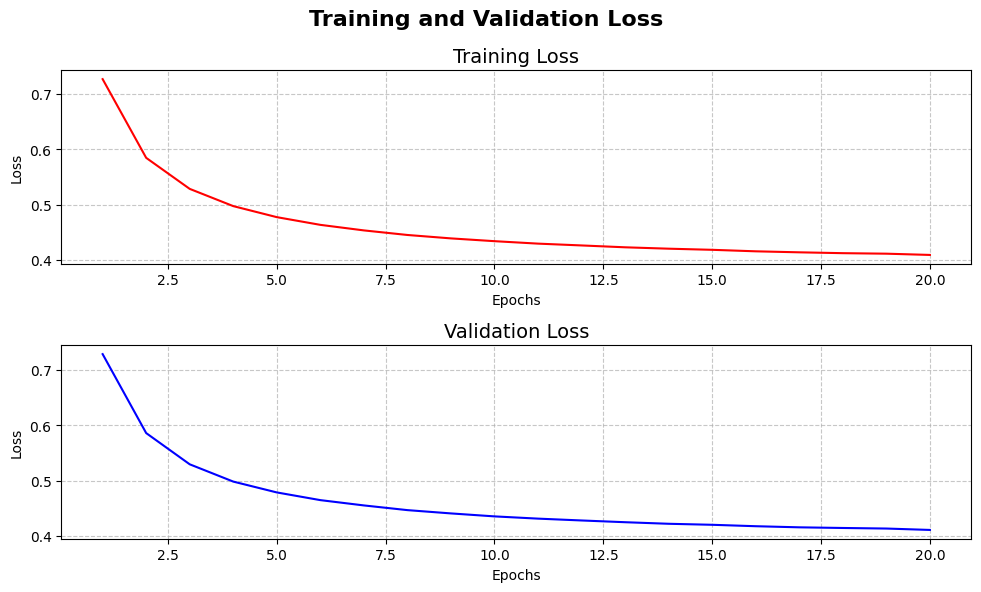

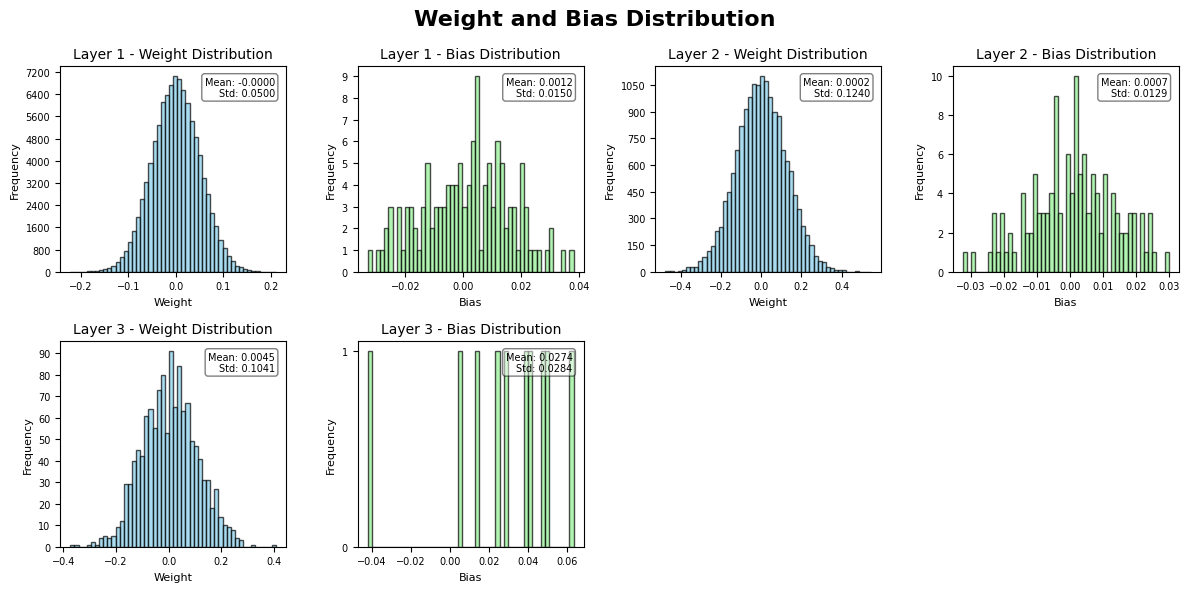

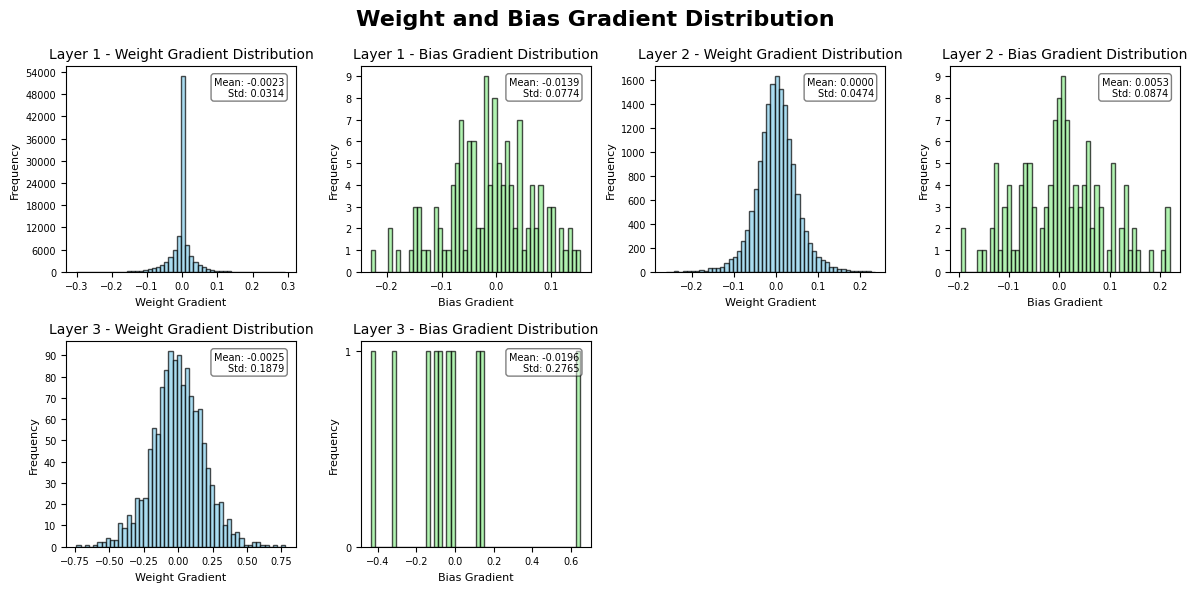

In [3]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(128, activation_function='linear', initialization_method="he_normal", seed=42)
model.add_layer(128, activation_function='linear', initialization_method="he_normal", seed=42)
model.add_layer(10, activation_function='linear', initialization_method="he_normal", seed=42)

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.01, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001, seed=42)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)
print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred: {y_pred_label[:20]}")
print(f"y_test: {y_test[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()

#### ReLU

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.2596, Val Loss: 0.2642
Training completed. Final Train Loss: 0.2596, Val Loss: 0.2642
Accuracy of FFNN: 0.8289
y_pred: [8 4 5 7 7 0 0 2 7 4 1 9 9 8 2 5 9 1 7 8]
y_test: [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


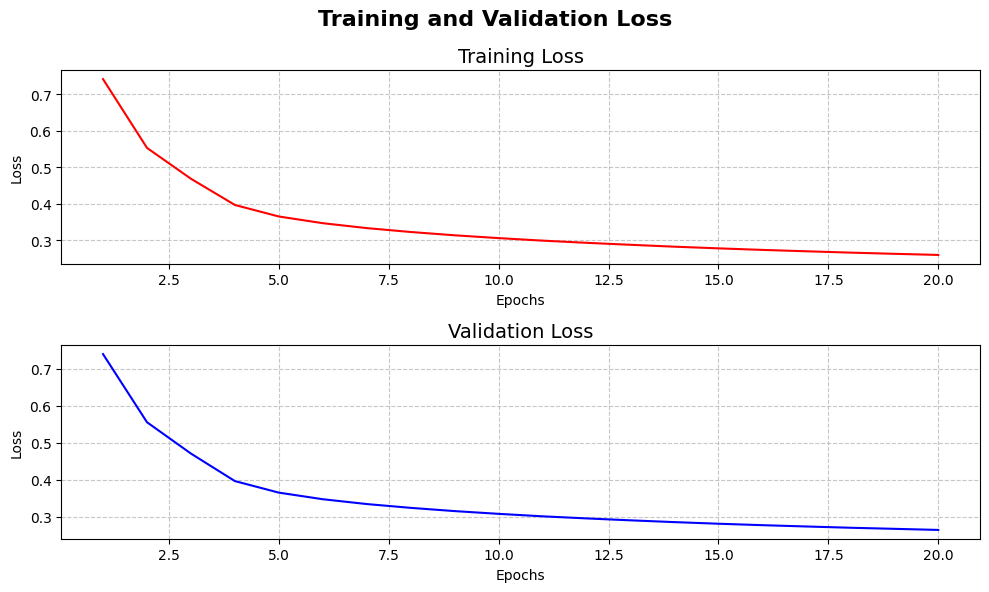

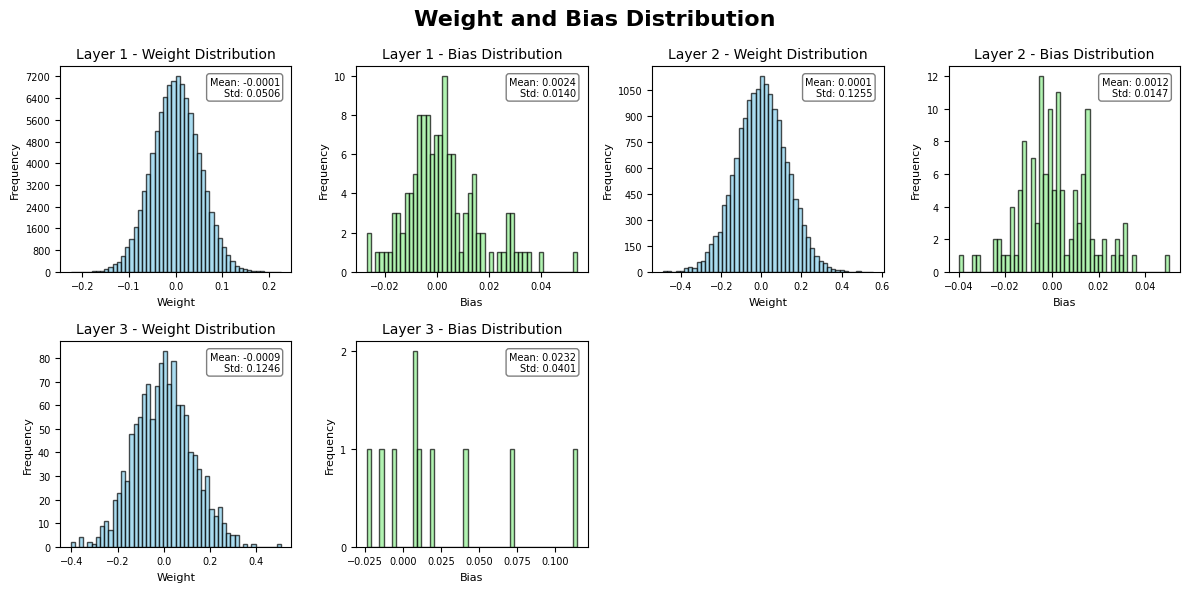

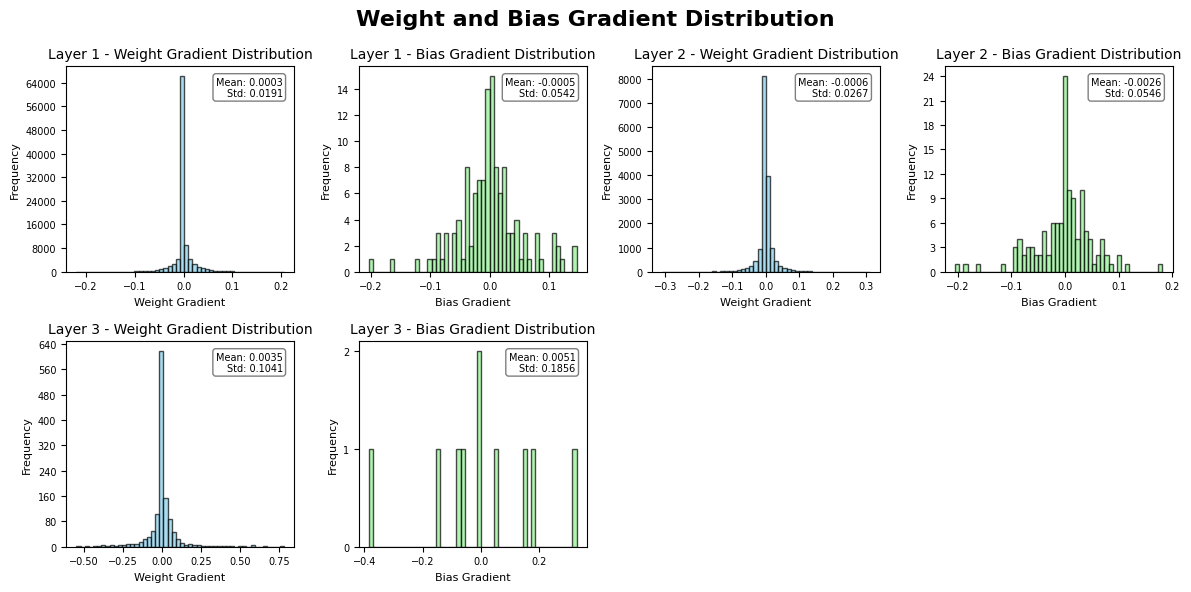

In [4]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(128, activation_function='relu', initialization_method="he_normal", seed=42)
model.add_layer(128, activation_function='relu', initialization_method="he_normal", seed=42)
model.add_layer(10, activation_function='relu', initialization_method="he_normal", seed=42)

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.01, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001, seed=42)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)
print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred: {y_pred_label[:20]}")
print(f"y_test: {y_test[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()

#### Sigmoid

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.8922, Val Loss: 0.8922
Training completed. Final Train Loss: 0.8922, Val Loss: 0.8922
Accuracy of FFNN: 0.1811
y_pred: [1 9 1 1 1 2 1 2 1 1 1 1 1 1 1 1 9 1 1 1]
y_test: [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


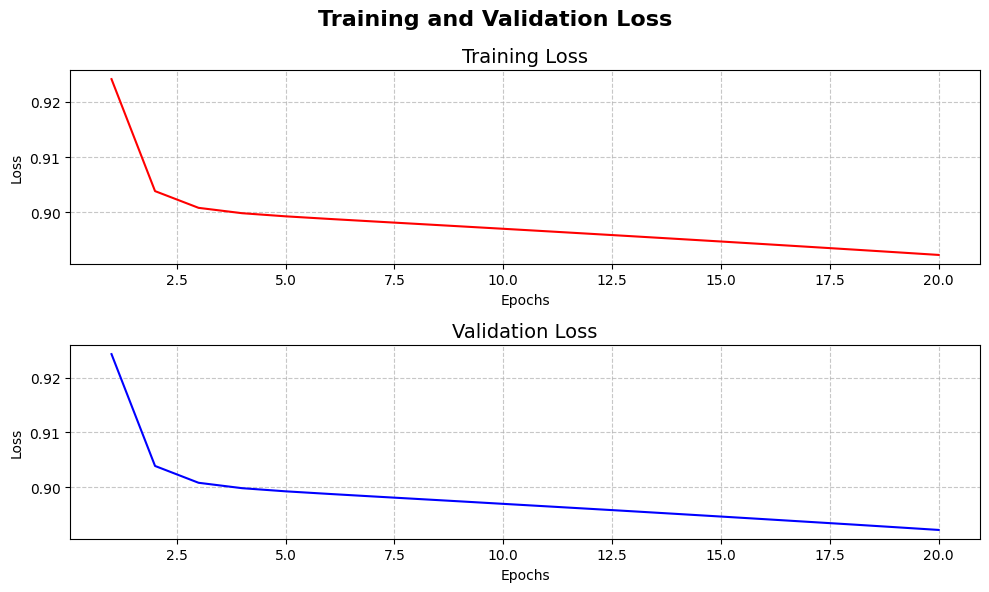

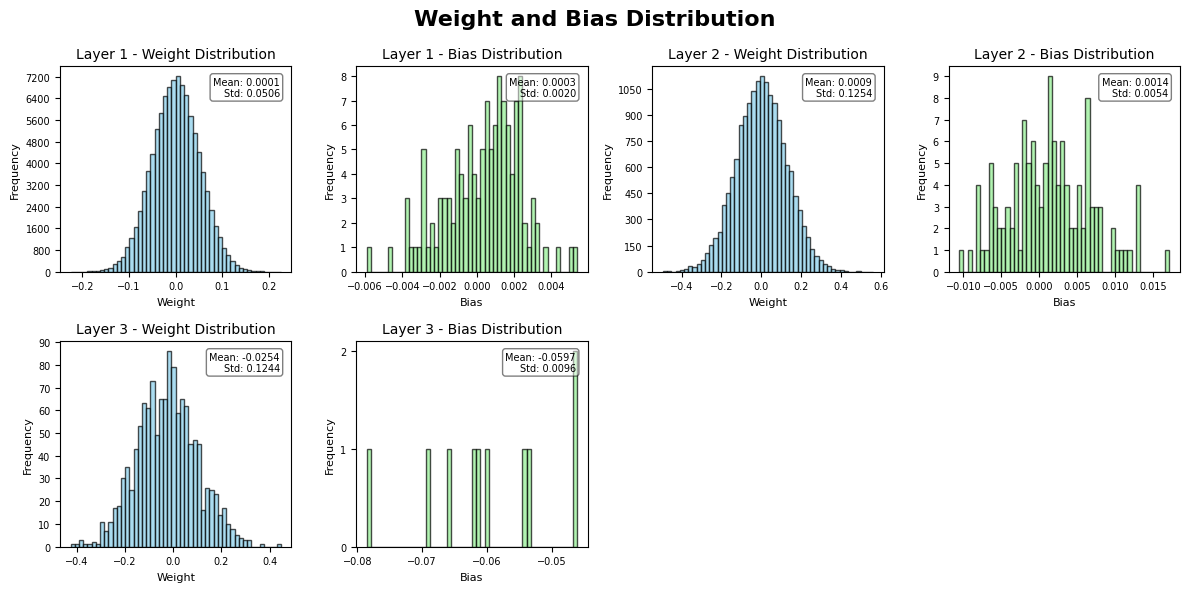

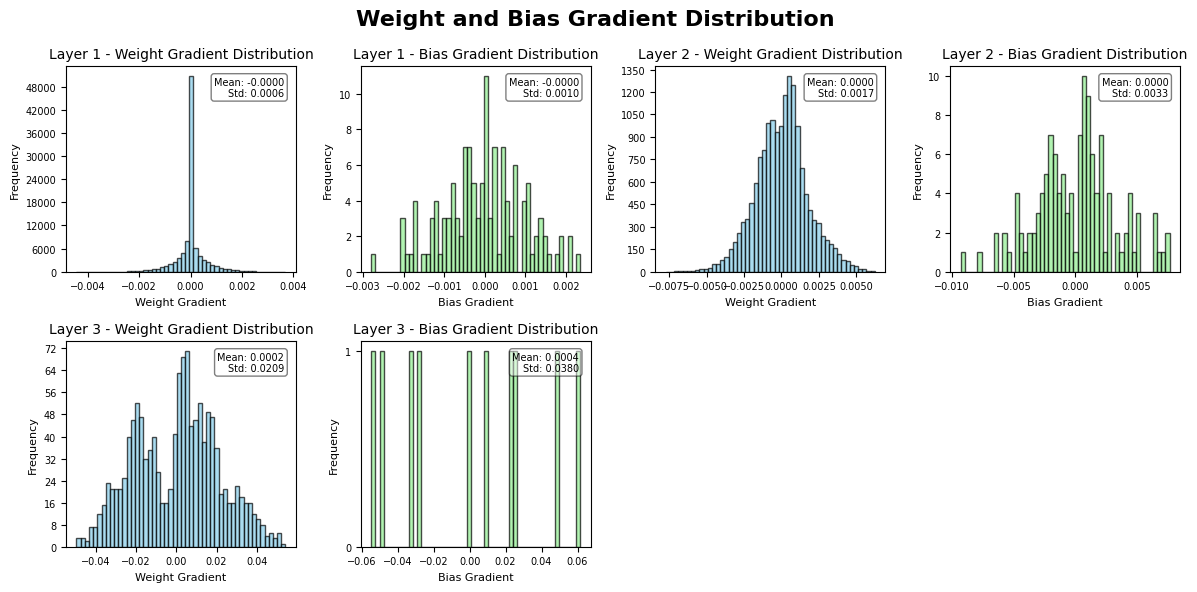

In [5]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(128, activation_function='sigmoid', initialization_method="he_normal", seed=42)
model.add_layer(128, activation_function='sigmoid', initialization_method="he_normal", seed=42)
model.add_layer(10, activation_function='sigmoid', initialization_method="he_normal", seed=42)

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.01, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001, seed=42)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)
print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred: {y_pred_label[:20]}")
print(f"y_test: {y_test[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()

#### Hyperbolic Tangent

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.3052, Val Loss: 0.3076
Training completed. Final Train Loss: 0.3052, Val Loss: 0.3076
Accuracy of FFNN: 0.9024
y_pred: [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]
y_test: [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


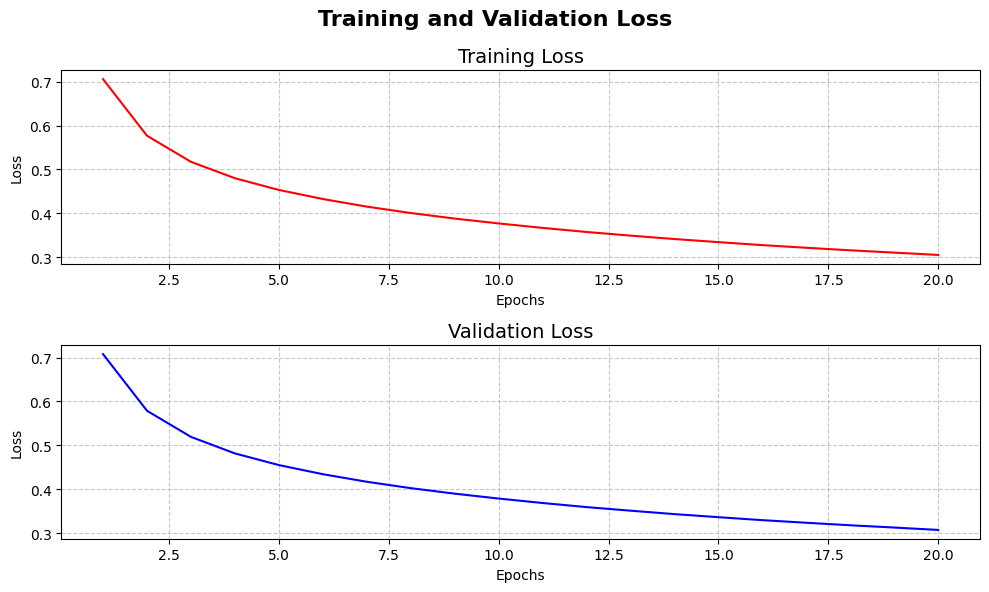

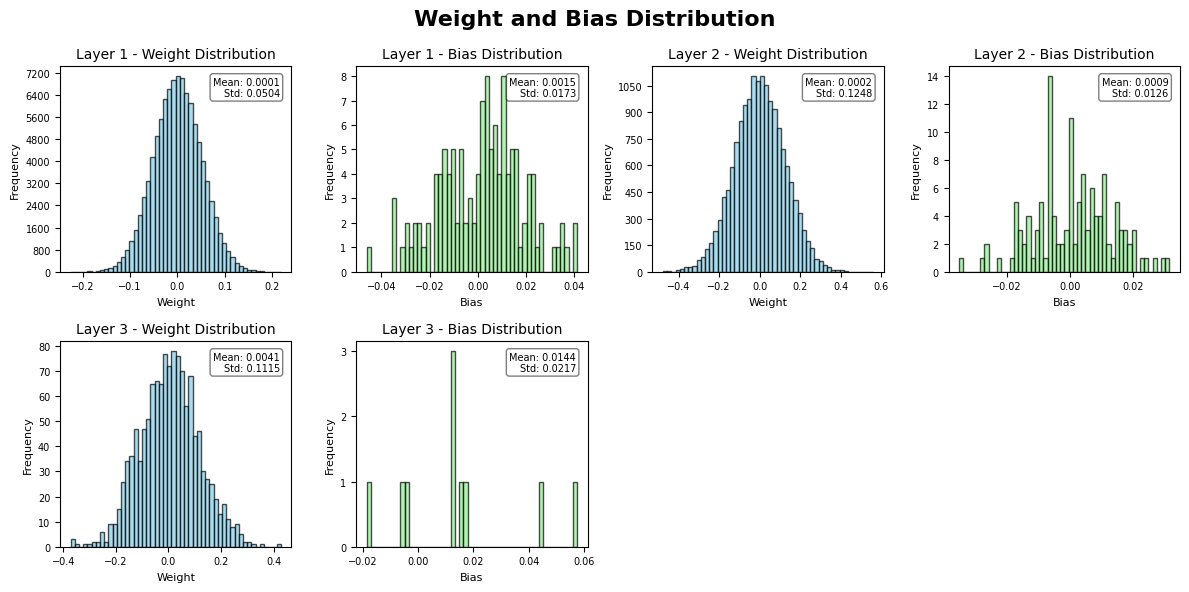

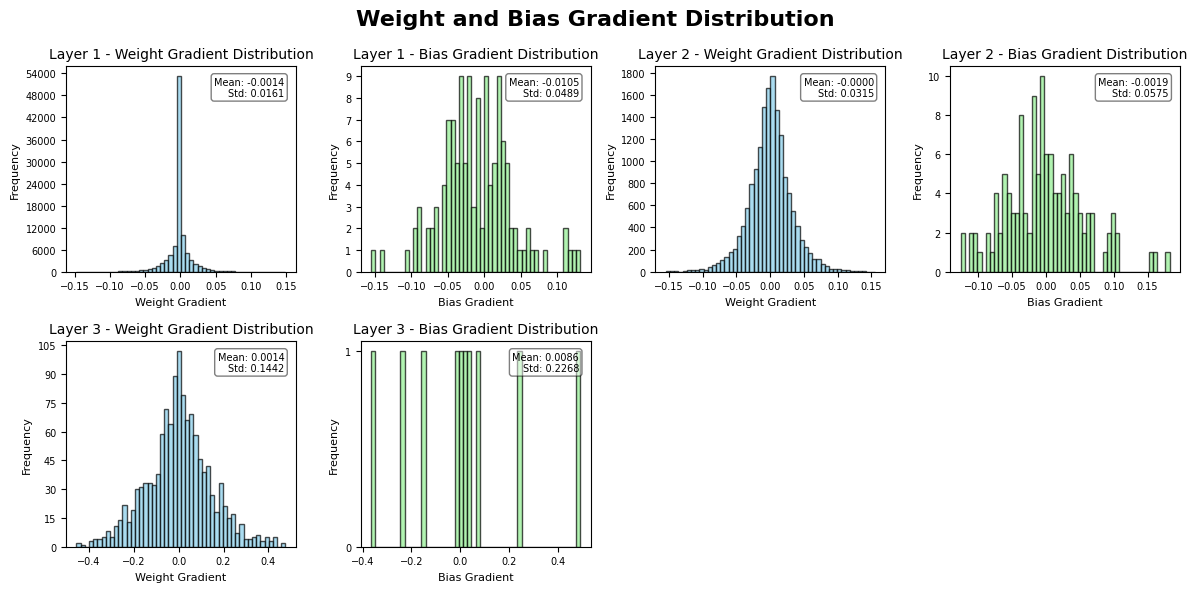

In [6]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(128, activation_function='tanh', initialization_method="he_normal", seed=42)
model.add_layer(128, activation_function='tanh', initialization_method="he_normal", seed=42)
model.add_layer(10, activation_function='tanh', initialization_method="he_normal", seed=42)

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.01, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001, seed=42)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)
print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred: {y_pred_label[:20]}")
print(f"y_test: {y_test[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()

### Leaky ReLU

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.1766, Val Loss: 0.1790
Training completed. Final Train Loss: 0.1766, Val Loss: 0.1790
Accuracy of FFNN: 0.9199
y_pred: [8 4 8 7 7 0 6 2 7 4 1 9 9 8 2 5 9 1 7 8]
y_test: [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


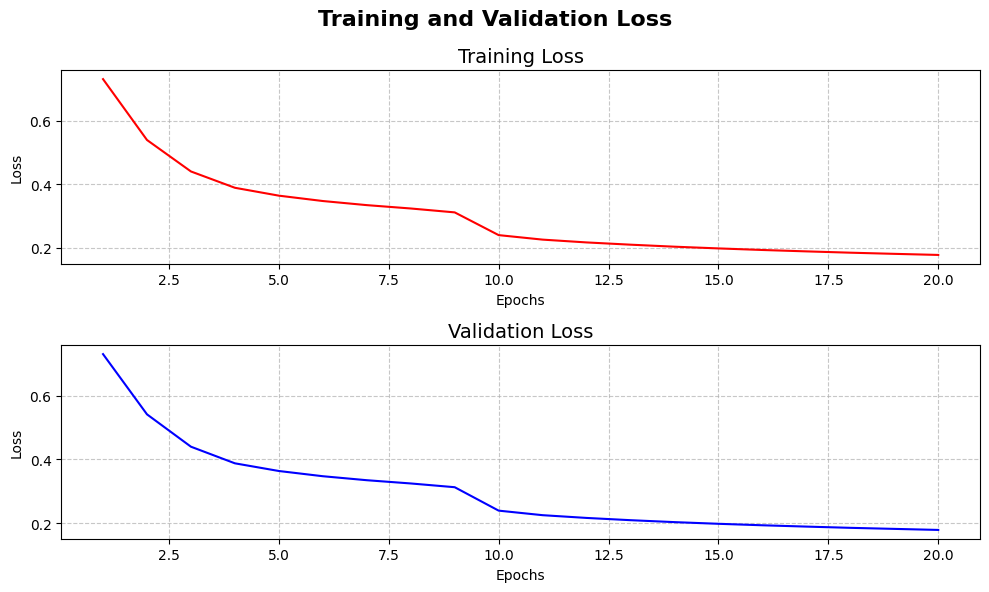

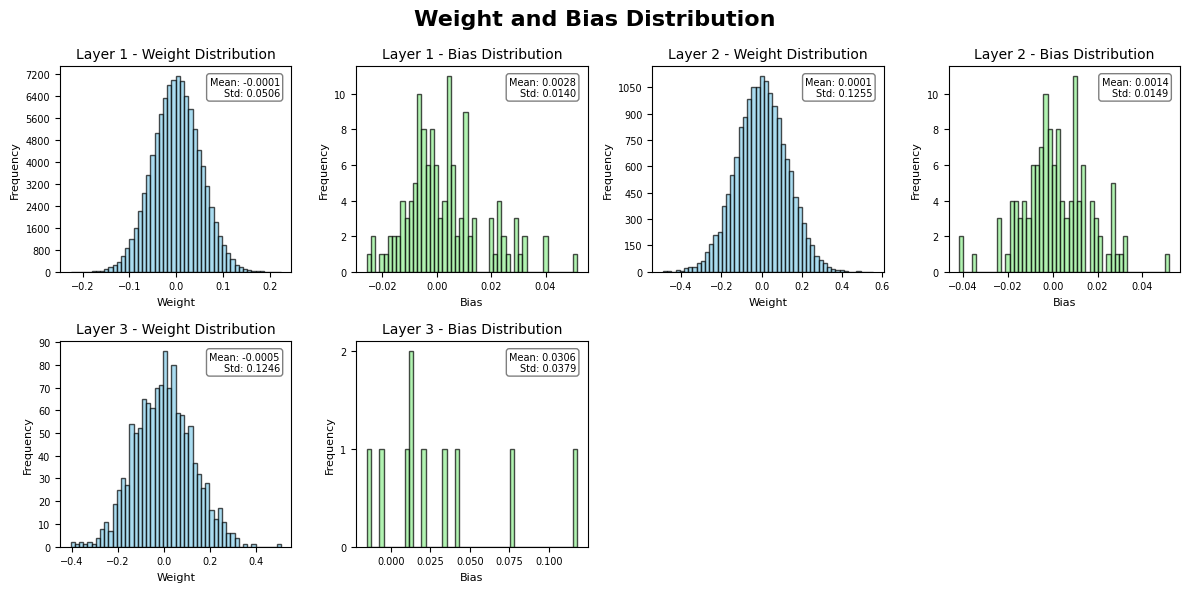

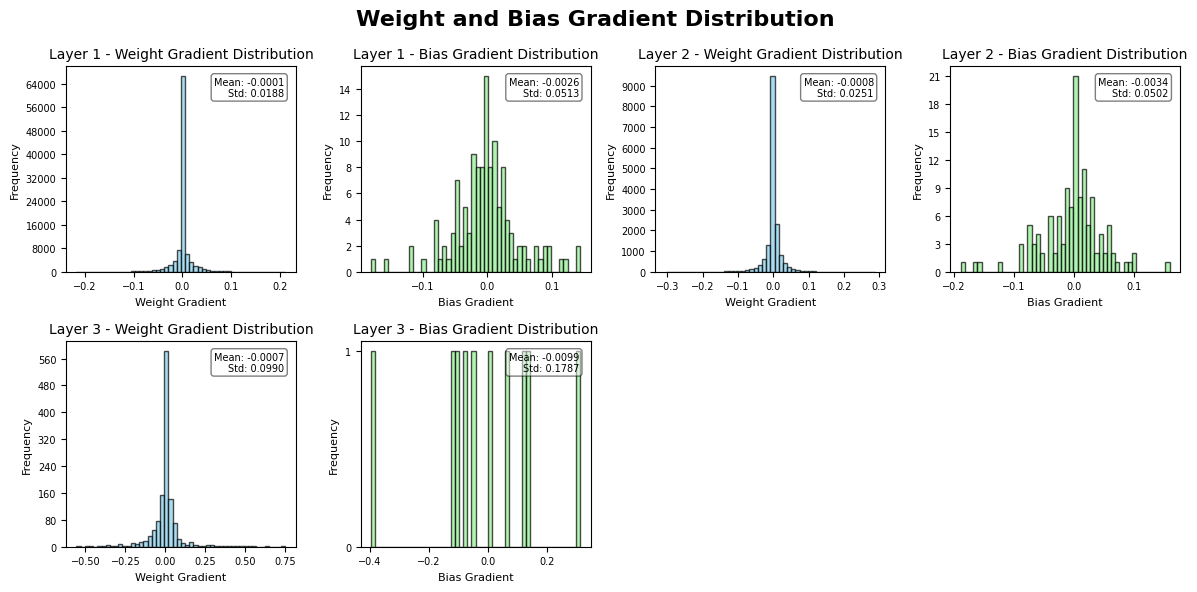

In [7]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(128, activation_function='leaky_relu', initialization_method="he_normal", seed=42)
model.add_layer(128, activation_function='leaky_relu', initialization_method="he_normal", seed=42)
model.add_layer(10, activation_function='leaky_relu', initialization_method="he_normal", seed=42)

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.01, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001, seed=42)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)
print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred: {y_pred_label[:20]}")
print(f"y_test: {y_test[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()

#### ELU

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.2768, Val Loss: 0.2792
Training completed. Final Train Loss: 0.2768, Val Loss: 0.2792
Accuracy of FFNN: 0.9081
y_pred: [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]
y_test: [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


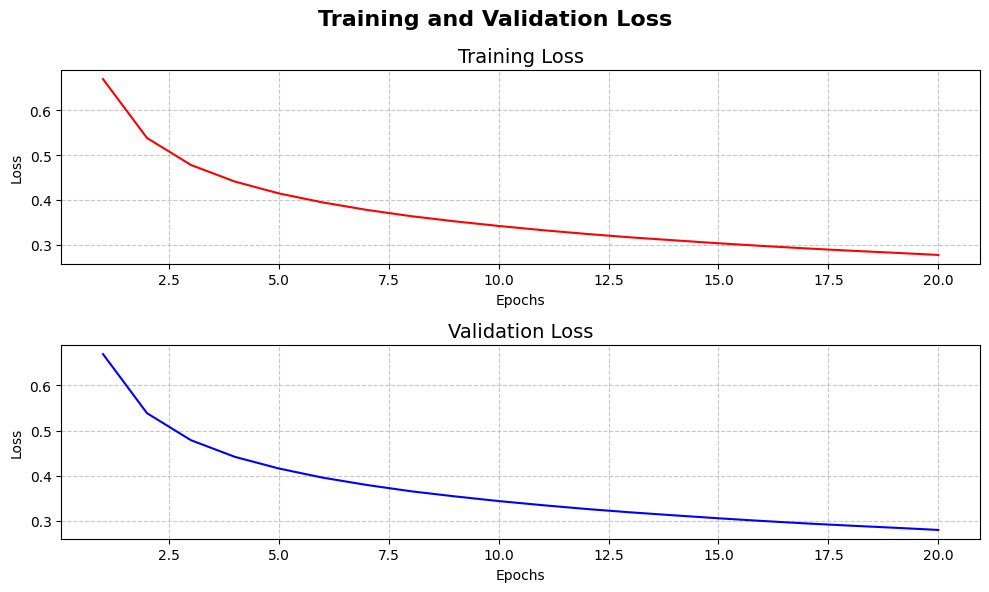

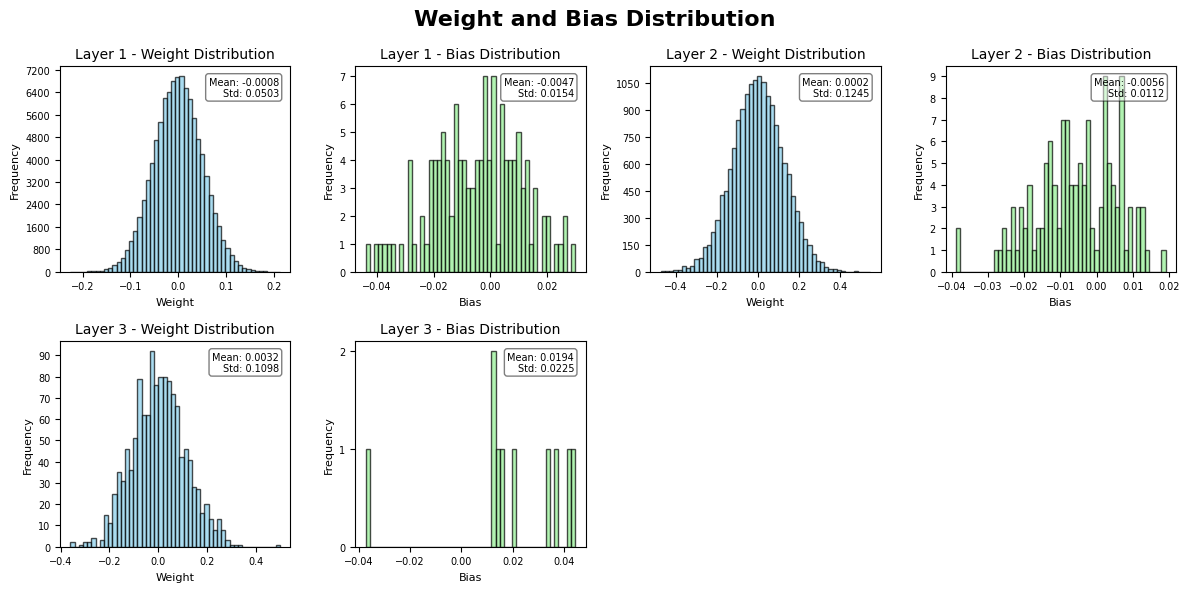

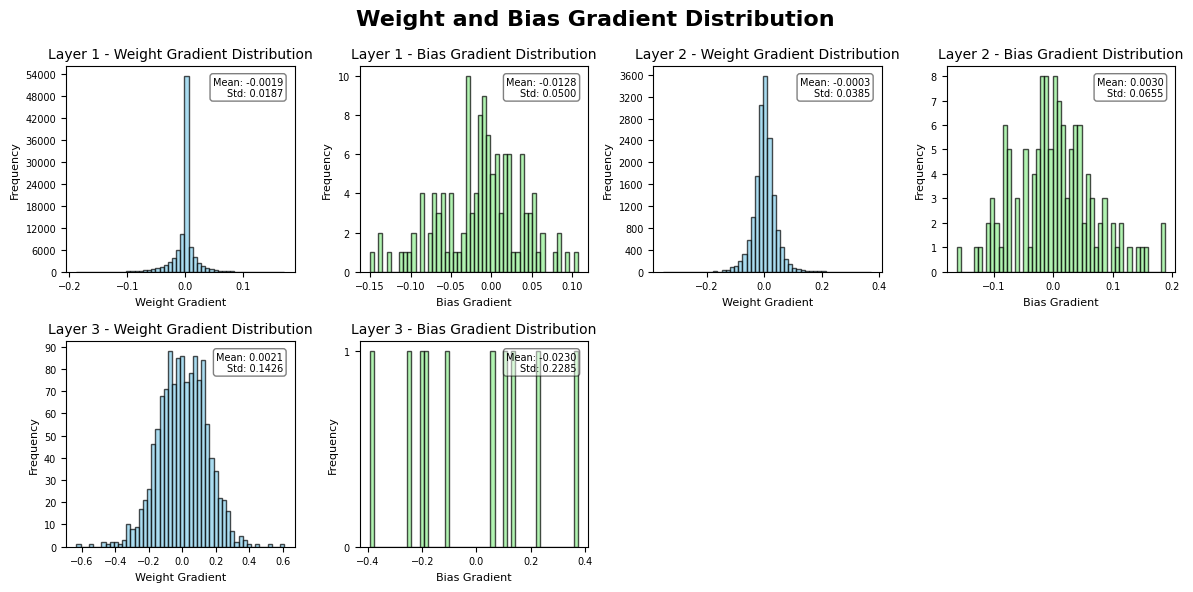

In [8]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(128, activation_function='elu', initialization_method="he_normal", seed=42)
model.add_layer(128, activation_function='elu', initialization_method="he_normal", seed=42)
model.add_layer(10, activation_function='elu', initialization_method="he_normal", seed=42)

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.01, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001, seed=42)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)
print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred: {y_pred_label[:20]}")
print(f"y_test: {y_test[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()

#### SELU

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.2892, Val Loss: 0.2928
Training completed. Final Train Loss: 0.2892, Val Loss: 0.2928
Accuracy of FFNN: 0.9045
y_pred: [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]
y_test: [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


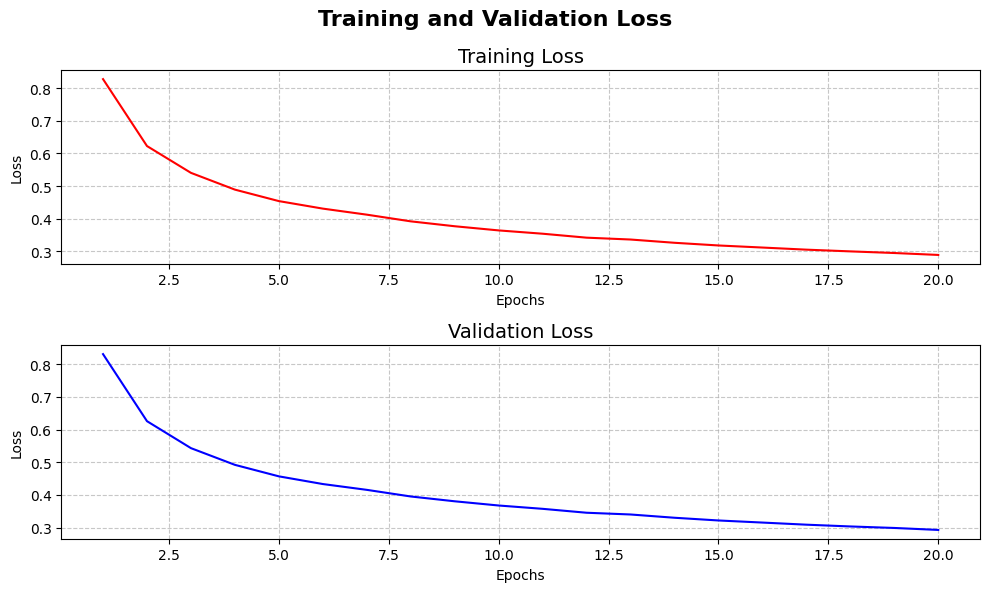

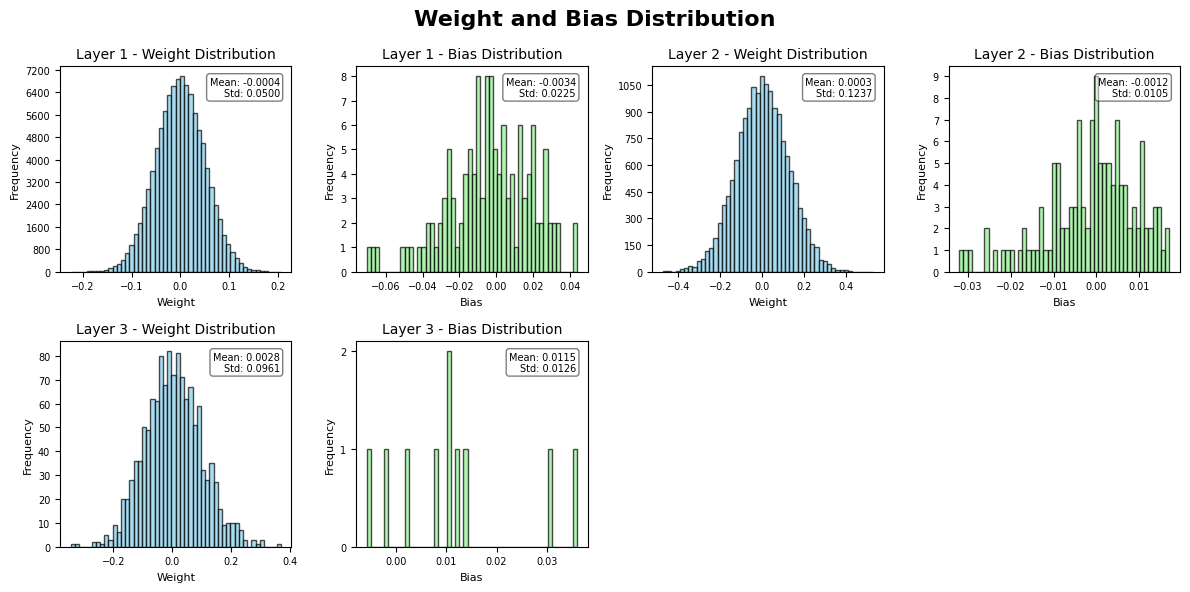

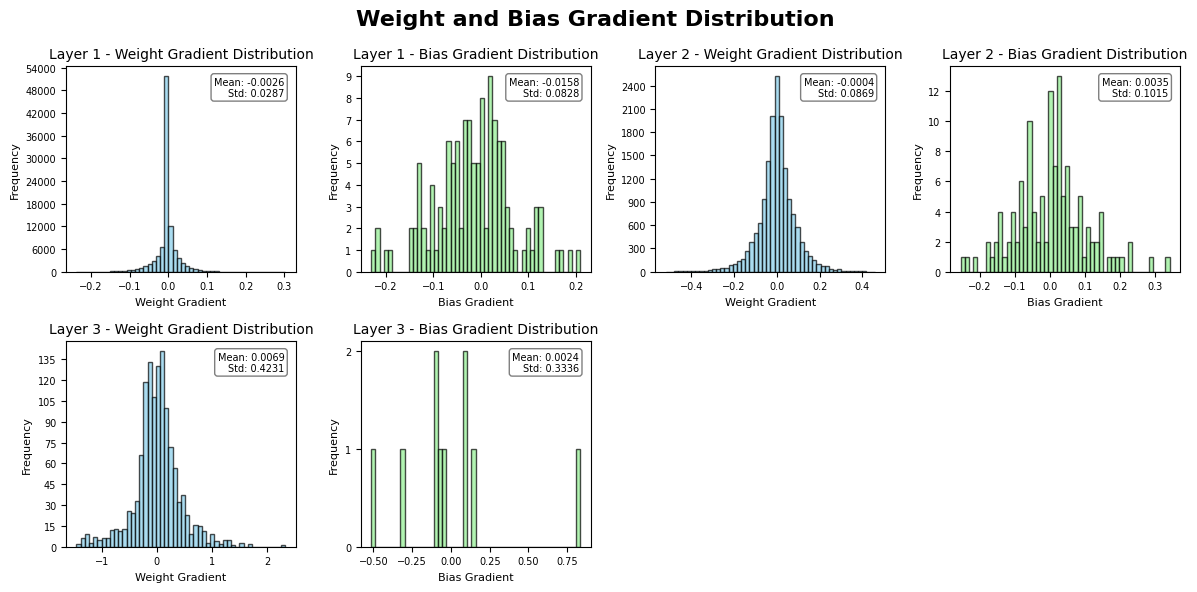

In [9]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(128, activation_function='selu', initialization_method="he_normal", seed=42)
model.add_layer(128, activation_function='selu', initialization_method="he_normal", seed=42)
model.add_layer(10, activation_function='selu', initialization_method="he_normal", seed=42)

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.01, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001, seed=42)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)
print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred: {y_pred_label[:20]}")
print(f"y_test: {y_test[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()

#### Swish

Epoch 20/20 [==================================================] 100.00%, Train Loss: 0.2992, Val Loss: 0.2997
Training completed. Final Train Loss: 0.2992, Val Loss: 0.2997
Accuracy of FFNN: 0.8847
y_pred: [8 4 5 7 7 0 6 2 7 4 1 9 7 8 2 5 9 1 7 8]
y_test: [8 4 8 7 7 0 6 2 7 4 3 9 9 8 2 5 9 1 7 8]


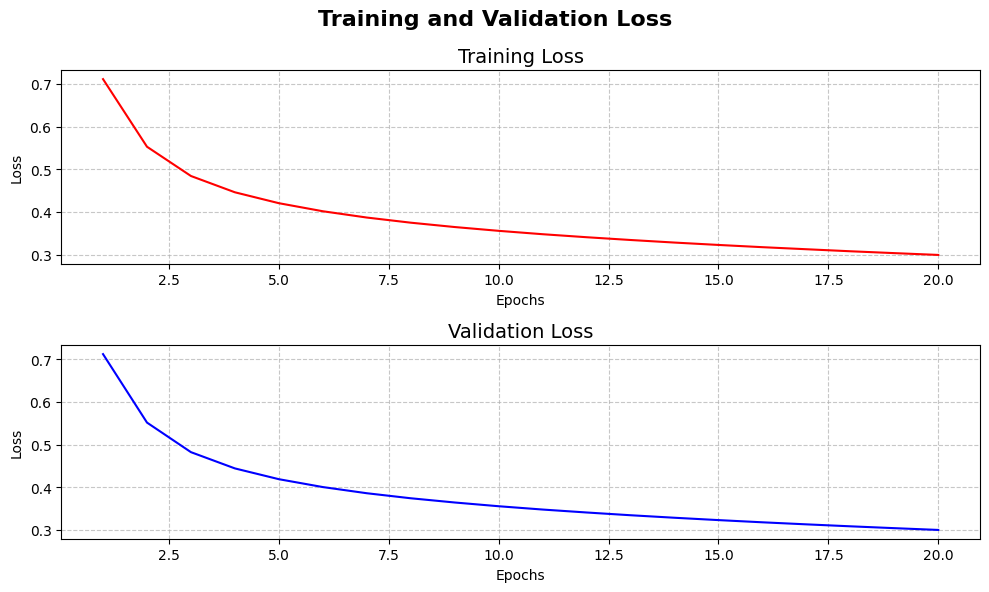

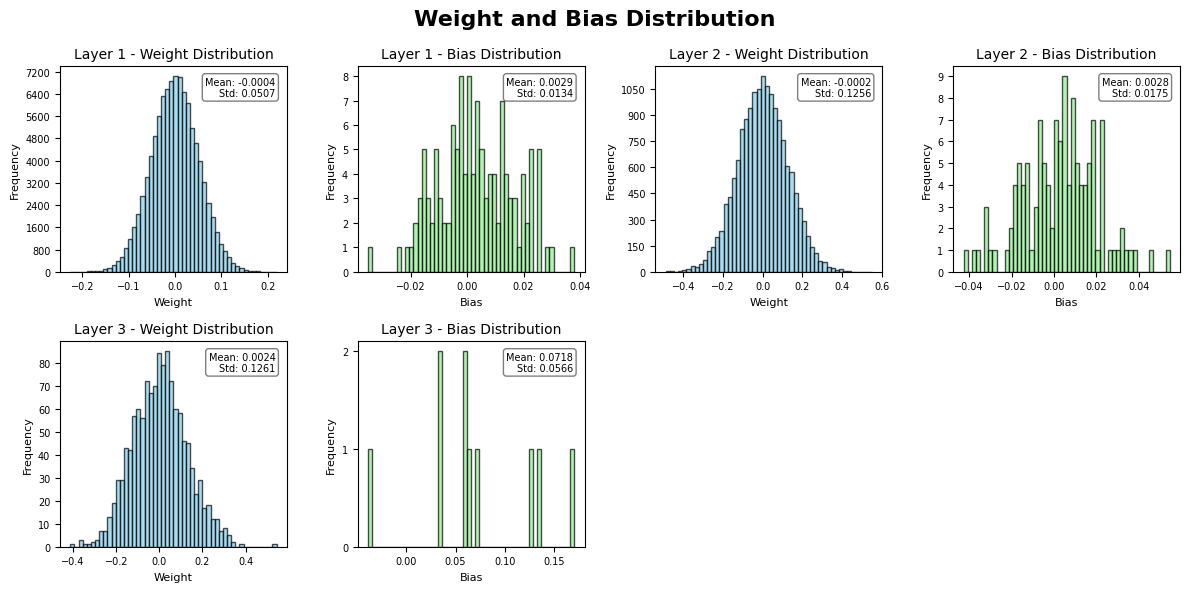

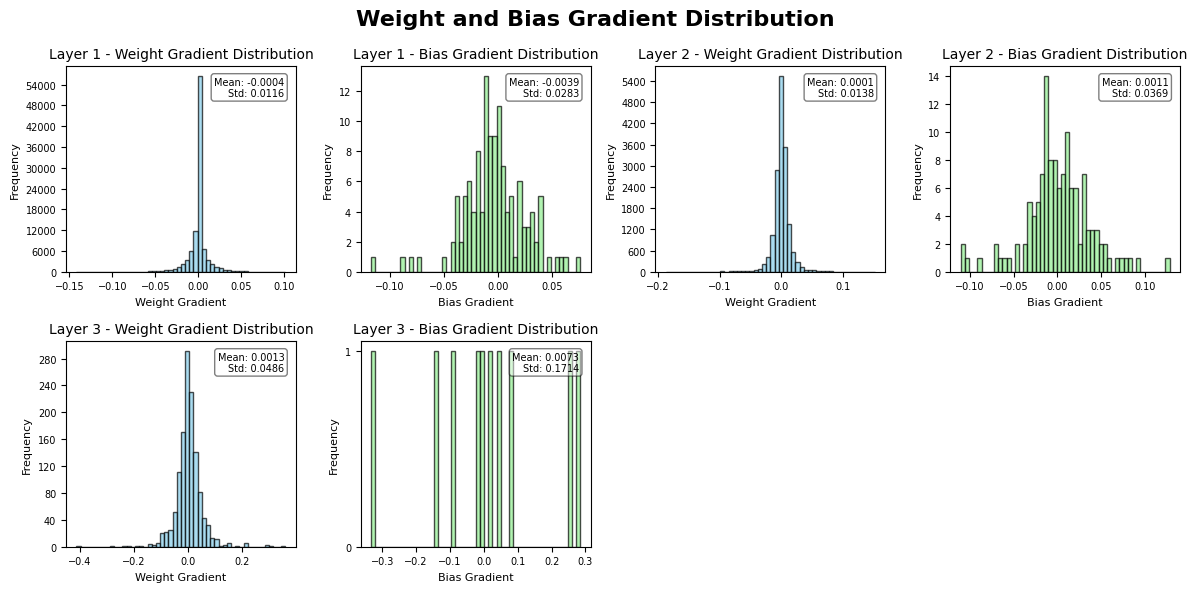

In [10]:
model = FFNN()

# Add layers to the model
model.add_layer(784)
model.add_layer(128, activation_function='swish', initialization_method="he_normal", seed=42)
model.add_layer(128, activation_function='swish', initialization_method="he_normal", seed=42)
model.add_layer(10, activation_function='swish', initialization_method="he_normal", seed=42)

# Train the model
model.train(X_train, y_train_one_hot, X_test, y_test_one_hot, 
            learning_rate=0.01, batch_size=64, epochs=20, loss_function="MSE", verbose=1, error_threshold=0.001, seed=42)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_label)
print(f"Accuracy of FFNN: {accuracy:.4f}")
print(f"y_pred: {y_pred_label[:20]}")
print(f"y_test: {y_test[:20]}")

# Plot the loss curve
model.plot_loss_function()

# Plot weights distribution for all layers
model.plot_weight_distribution()

# Plot weights gradient distribution for all layers
model.plot_gradient_distribution()